In [ ]:
# This should be included at the top of every .ipynb file in the project
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parents[1]
sys.path.append(str(PROJECT_ROOT))

In [3]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_path = "../data/KDDTrain+.csv"

In [7]:
# Charger le dataset nettoyé 
data = pd.read_csv(data_path)


In [8]:
# Vérifier les 5 premières lignes pour s'assurer que le dataset est correct
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,Normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,Normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,DoS


In [9]:
# Sélection des colonnes numériques
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Features numériques : {numeric_features.tolist()}")


Features numériques : ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [10]:
# Matrice de corrélation
corr = data[numeric_features].corr()

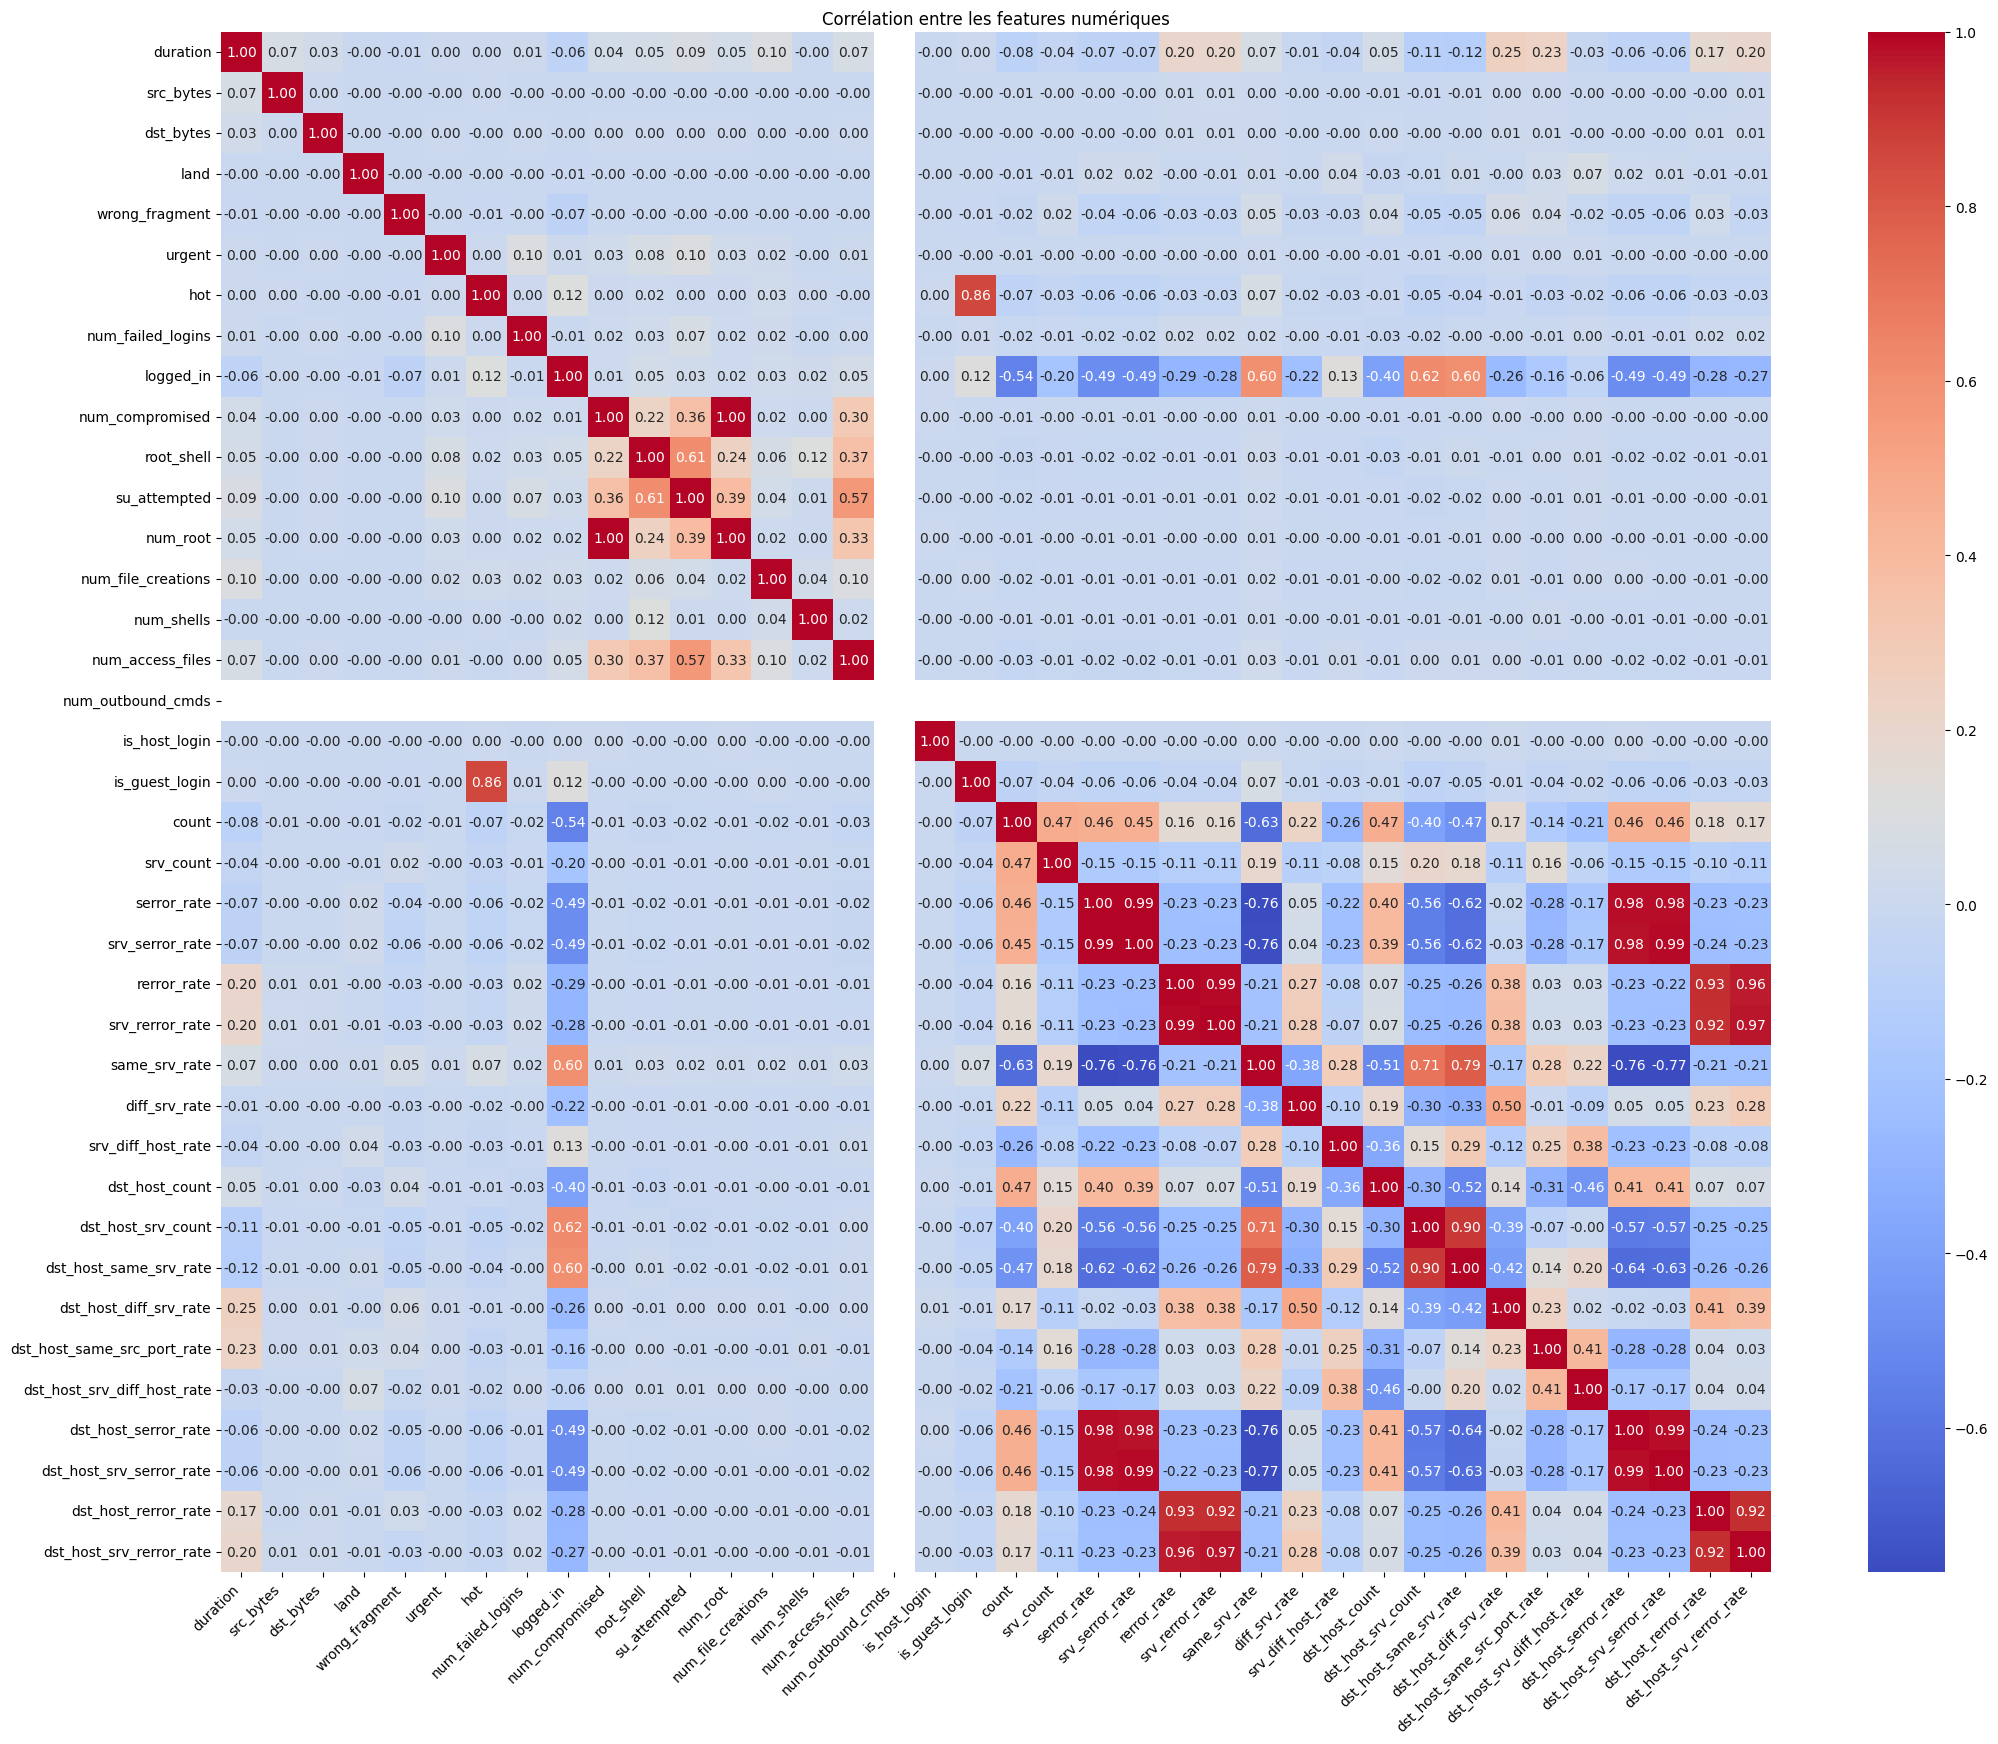

In [11]:
# Heatmap pour visualiser la corrélation
plt.figure(figsize=(25, 20))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    xticklabels=True,
    yticklabels=True
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Corrélation entre les features numériques")
plt.show()


In [12]:
# afficher les paires de features avec forte corrélation (> 0.8 ou < -0.8)
high_corr = corr[(corr > 0.8) & (corr < 1.0)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("Paires de features fortement corrélées (>0.8) :")
print(high_corr)


Paires de features fortement corrélées (>0.8) :
                   Feature 1                 Feature 2  Correlation
0                        hot            is_guest_login     0.860288
1            num_compromised                  num_root     0.998833
2                   num_root           num_compromised     0.998833
3             is_guest_login                       hot     0.860288
4                serror_rate           srv_serror_rate     0.993289
5                serror_rate      dst_host_serror_rate     0.979373
6                serror_rate  dst_host_srv_serror_rate     0.981139
7            srv_serror_rate               serror_rate     0.993289
8            srv_serror_rate      dst_host_serror_rate     0.977596
9            srv_serror_rate  dst_host_srv_serror_rate     0.986252
10               rerror_rate           srv_rerror_rate     0.989008
11               rerror_rate      dst_host_rerror_rate     0.926749
12               rerror_rate  dst_host_srv_rerror_rate     0.964449


In [13]:
# Liste pour stocker les colonnes à supprimer
to_drop = []

# Boucle sur les paires fortement corrélées
for _, row in high_corr.iterrows():
    f1 = row['Feature 1']
    f2 = row['Feature 2']
    
    # Si aucune des deux n'a déjà été marquée, on en supprime une
    if f1 not in to_drop and f2 not in to_drop:
        to_drop.append(f2)  # on choisit arbitrairement de supprimer f2

print("Colonnes à supprimer pour réduire la multicolinéarité :")
print(to_drop)

# Supprimer ces colonnes du dataset
data_reduced = data.drop(columns=to_drop)

print(f"Nouvelle shape du dataset : {data_reduced.shape}")


Colonnes à supprimer pour réduire la multicolinéarité :
['is_guest_login', 'num_root', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate']
Nouvelle shape du dataset : (125972, 34)


In [14]:
data_reduced.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal,Normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,255,26,0.05,0.00,0.00,neptune,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal,Normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.16,0.06,0.00,255,19,0.07,0.00,0.00,neptune,DoS


In [15]:
reduced_data_path = "../data/KDD_reduced.csv"

In [16]:
data_reduced.to_csv(reduced_data_path, index=False)